In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial

In [2]:
def birthday_probability_exact(n_people):
    """
    Calculates the exact probability that at least two people in a group of n_people
    share the same birthday, using combinatorial methods.
    """
    if n_people > 365:
        return 1.0

    # Calculate the probability that all birthdays are different
    prob_all_different = 1.0
    for i in range(n_people):
        prob_all_different *= (365 - i) / 365

    # Probability of at least two people sharing a birthday = 1 - probability of all birthdays being different
    return 1 - prob_all_different

In [3]:
def find_threshold_people():
    """
    Finds the minimum number of people for the probability to exceed 50%.
    """
    for n in range(1, 100):
        prob = birthday_probability_exact(n)
        if prob > 0.5:
            return n, prob
    return None, None

In [4]:
# Find the critical point
threshold_people, threshold_prob = find_threshold_people()

print("🎂 Birthday Paradox Analysis")
print("=" * 50)
print(f"Answer: You need {threshold_people} people")
print(f"Probability: {threshold_prob:.4f} ({threshold_prob*100:.2f}%)")
print("=" * 50)

🎂 Birthday Paradox Analysis
Answer: You need 23 people
Probability: 0.5073 (50.73%)


In [5]:
def birthday_probability_simulation(n_people, n_simulations=10_000):
    """
    Calculates the probability using Monte Carlo simulation.
    """
    matches = 0

    for _ in range(n_simulations):
        # Randomly generate birthdays for n people
        birthdays = np.random.randint(1, 366, n_people)

        # Check if there are any duplicate birthdays
        if len(set(birthdays)) < len(birthdays):
            matches += 1

    return matches / n_simulations

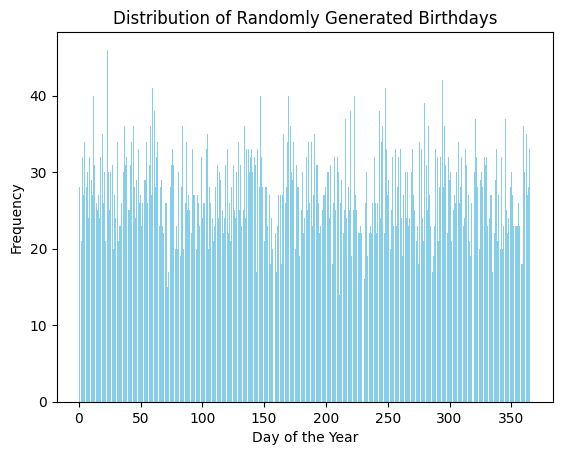

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_people = 10000
birthdays = np.random.randint(1, 366, n_people)

unique, counts = np.unique(birthdays, return_counts=True)

plt.bar(unique, counts, color='skyblue')
plt.xlabel('Day of the Year')
plt.ylabel('Frequency')
plt.title('Distribution of Randomly Generated Birthdays')
plt.show()


📊 Key Data Points:
People	Exact Prob	Simulated Prob
-----------------------------------
10	0.1169		0.1184
20	0.4114		0.4100
23	0.5073		0.5098
30	0.7063		0.7065
40	0.8912		0.8914
50	0.9704		0.9711
60	0.9941		0.9939
70	0.9992		0.9993


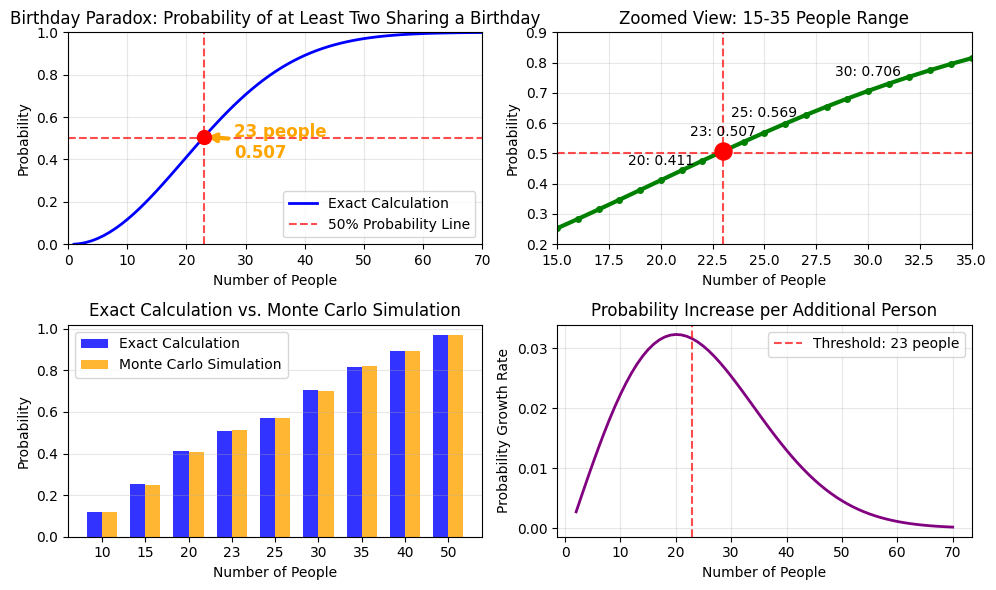

In [7]:
# Calculate probabilities for a range of people
people_range = range(1, 71)
exact_probabilities = [birthday_probability_exact(n) for n in people_range]

# Display some key data points
key_points = [10, 20, 23, 30, 40, 50, 60, 70]
print("\n📊 Key Data Points:")
print("People\tExact Prob\tSimulated Prob")
print("-" * 35)

for n in key_points:
    exact_prob = birthday_probability_exact(n)
    sim_prob = birthday_probability_simulation(n)
    print(f"{n}\t{exact_prob:.4f}\t\t{sim_prob:.4f}")

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# Plot 1: Probability Curve
ax1.plot(people_range, exact_probabilities, 'b-', linewidth=2, label='Exact Calculation')
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='50% Probability Line')
ax1.axvline(x=threshold_people, color='r', linestyle='--', alpha=0.7)
ax1.scatter([threshold_people], [threshold_prob], color='red', s=100, zorder=5)
ax1.annotate(f'{threshold_people} people\n{threshold_prob:.3f}',
             xy=(threshold_people, threshold_prob),
             xytext=(threshold_people+5, threshold_prob-0.1),
             arrowprops=dict(arrowstyle='->', color='orange', linewidth=3),
             fontsize=12, color='orange', fontweight='bold')

ax1.set_xlabel('Number of People')
ax1.set_ylabel('Probability')
ax1.set_title('Birthday Paradox: Probability of at Least Two Sharing a Birthday')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, 70)
ax1.set_ylim(0, 1)

# Plot 2: Zoomed View (15-35 people)
zoom_range = range(15, 36)
zoom_probs = [birthday_probability_exact(n) for n in zoom_range]

ax2.plot(zoom_range, zoom_probs, 'g-', linewidth=3, marker='o', markersize=4)
ax2.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
ax2.axvline(x=threshold_people, color='r', linestyle='--', alpha=0.7)
ax2.scatter([threshold_people], [threshold_prob], color='red', s=150, zorder=5)

# Annotate some key points
for n in [20, 23, 25, 30]:
    prob = birthday_probability_exact(n)
    ax2.annotate(f'{n}: {prob:.3f}',
                xy=(n, prob),
                xytext=(n, prob+0.05),
                ha='center', fontsize=10)

ax2.set_xlabel('Number of People')
ax2.set_ylabel('Probability')
ax2.set_title('Zoomed View: 15-35 People Range')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(15, 35)
ax2.set_ylim(0.2, 0.9)

# Plot 3: Exact Calculation vs. Simulation Comparison
sample_people = [10, 15, 20, 23, 25, 30, 35, 40, 50]
exact_samples = [birthday_probability_exact(n) for n in sample_people]
sim_samples = [birthday_probability_simulation(n) for n in sample_people]

x_pos = np.arange(len(sample_people))
width = 0.35

ax3.bar(x_pos - width/2, exact_samples, width, label='Exact Calculation', alpha=0.8, color='blue')
ax3.bar(x_pos + width/2, sim_samples, width, label='Monte Carlo Simulation', alpha=0.8, color='orange')

ax3.set_xlabel('Number of People')
ax3.set_ylabel('Probability')
ax3.set_title('Exact Calculation vs. Monte Carlo Simulation')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(sample_people)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Probability Growth Rate
prob_differences = [exact_probabilities[i+1] - exact_probabilities[i]
                   for i in range(len(exact_probabilities)-1)]

ax4.plot(range(2, 71), prob_differences, 'purple', linewidth=2)
ax4.axvline(x=threshold_people, color='r', linestyle='--', alpha=0.7,
           label=f'Threshold: {threshold_people} people')
ax4.set_xlabel('Number of People')
ax4.set_ylabel('Probability Growth Rate')
ax4.set_title('Probability Increase per Additional Person')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# Appendix

In [8]:
# Detailed Analysis
print(f"\n🔍 Detailed Analysis:")
print(f"• When the number of people is {threshold_people-1}, the probability is {birthday_probability_exact(threshold_people-1):.4f}")
print(f"• When the number of people is {threshold_people}, the probability is {threshold_prob:.4f}")
print(f"• Adding 1 person increases the probability by {threshold_prob - birthday_probability_exact(threshold_people-1):.4f}")

print(f"\n💡 Interesting Observations:")
print(f"• 10 people: {birthday_probability_exact(10):.1%} probability")
print(f"• 20 people: {birthday_probability_exact(20):.1%} probability")
print(f"• 30 people: {birthday_probability_exact(30):.1%} probability")
print(f"• 50 people: {birthday_probability_exact(50):.1%} probability")
print(f"• 70 people: {birthday_probability_exact(70):.1%} probability")

print(f"\n🧮 Mathematical Formula:")
print("P(at least 2 people share a birthday) = 1 - P(all birthdays are different)")
print("P(all birthdays are different) = (365/365) × (364/365) × (363/365) × ... × ((365-n+1)/365)")

# Create probability table
prob_table = pd.DataFrame({
    'Number of People': list(range(10, 71, 5)),
    'Probability': [f"{birthday_probability_exact(n):.4f}" for n in range(10, 71, 5)],
    'Percentage': [f"{birthday_probability_exact(n)*100:.2f}%" for n in range(10, 71, 5)]
})

print(f"\n📋 Probability Table:")
print(prob_table.to_string(index=False))


🔍 Detailed Analysis:
• When the number of people is 22, the probability is 0.4757
• When the number of people is 23, the probability is 0.5073
• Adding 1 person increases the probability by 0.0316

💡 Interesting Observations:
• 10 people: 11.7% probability
• 20 people: 41.1% probability
• 30 people: 70.6% probability
• 50 people: 97.0% probability
• 70 people: 99.9% probability

🧮 Mathematical Formula:
P(at least 2 people share a birthday) = 1 - P(all birthdays are different)
P(all birthdays are different) = (365/365) × (364/365) × (363/365) × ... × ((365-n+1)/365)

📋 Probability Table:
 Number of People Probability Percentage
               10      0.1169     11.69%
               15      0.2529     25.29%
               20      0.4114     41.14%
               25      0.5687     56.87%
               30      0.7063     70.63%
               35      0.8144     81.44%
               40      0.8912     89.12%
               45      0.9410     94.10%
               50      0.9704     97